In [1]:
import csv
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
#import tensorflow as tf

#print("Number of available GPUs:", len(tf.config.list_physical_devices('GPU')))


In [2]:
df = pd.read_csv('df_heartbeats.csv')
df = df.drop(columns=['Unnamed: 0'])
df['y'] = df['y'].astype(int)

df_id = df['id']
df = df.drop(columns='id', axis=1)


In [3]:
df.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p171,p172,p173,p174,p175,p176,p177,p178,p179,y
0,0.626464,0.431240,0.279882,0.166732,0.048011,-0.001980,-0.023332,-0.031588,-0.039795,-0.042603,...,0.545917,0.566186,0.584929,0.600355,0.616225,0.619863,0.605166,0.555898,0.489157,0
1,0.040655,0.082554,0.126426,0.163102,0.179503,0.189659,0.197058,0.195587,0.178714,0.162724,...,0.991326,1.045085,1.072971,1.071747,0.990139,0.836041,0.634466,0.539789,0.500674,0
2,-0.125678,-0.139730,-0.150217,-0.165540,-0.184568,-0.184097,-0.160878,-0.140599,-0.123626,-0.106982,...,0.932409,0.978868,1.012156,1.020017,1.012003,0.978072,0.905556,0.791963,0.705112,0
3,0.000596,0.007339,0.021266,0.049850,0.088593,0.108492,0.125509,0.122578,0.087381,0.063590,...,0.832021,0.846369,0.856866,0.864649,0.871785,0.873088,0.862639,0.846196,0.816157,0
4,0.040116,0.015480,0.014191,0.038011,0.059909,0.081431,0.095693,0.089187,0.073305,0.057664,...,0.582873,0.610044,0.638048,0.662674,0.614156,0.569447,0.541417,0.512271,0.484535,0


In [4]:
df['y'].value_counts()

y
0    107350
2     59112
1     20454
3      5632
Name: count, dtype: int64

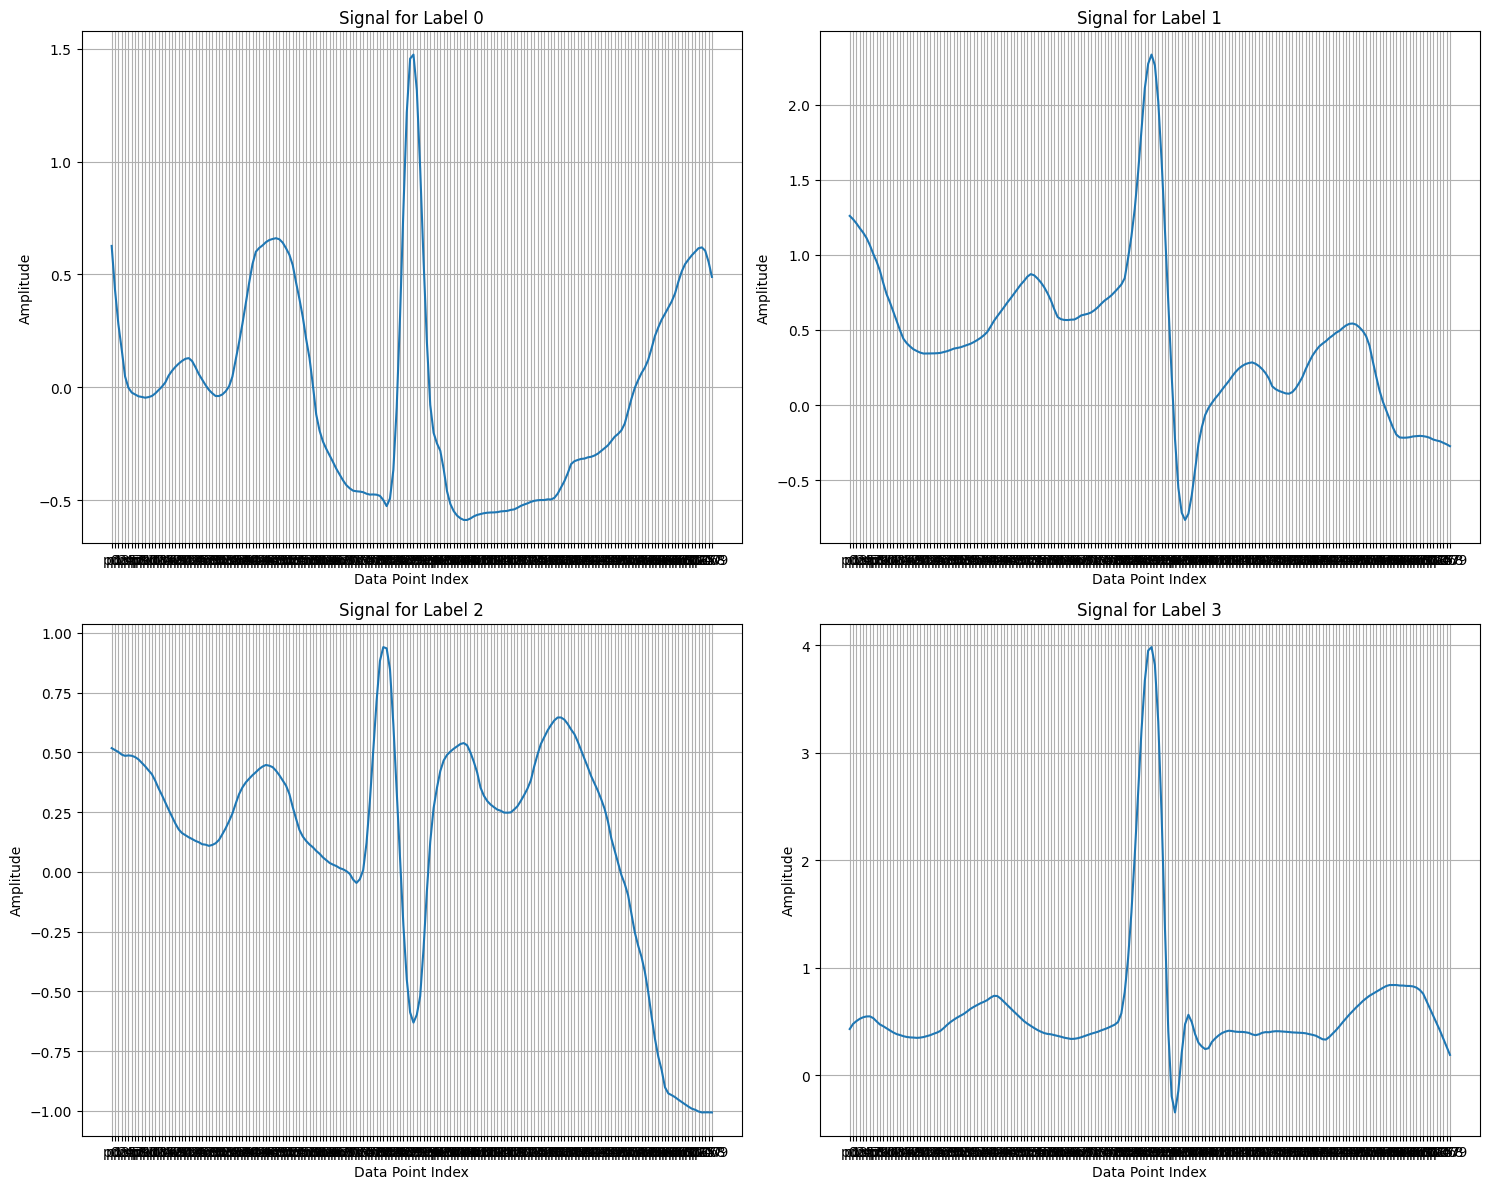

In [6]:
import matplotlib.pyplot as plt

# Plot 4 signals, one for each class, in one big figure
labels_to_plot = df['y'].unique()

plt.figure(figsize=(15, 12))

for i, label in enumerate(labels_to_plot, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    label_data = df[df['y'] == label].drop(['y'], axis=1).iloc[0]
    plt.plot(label_data)
    plt.title(f'Signal for Label {label}')
    plt.xlabel('Data Point Index')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()


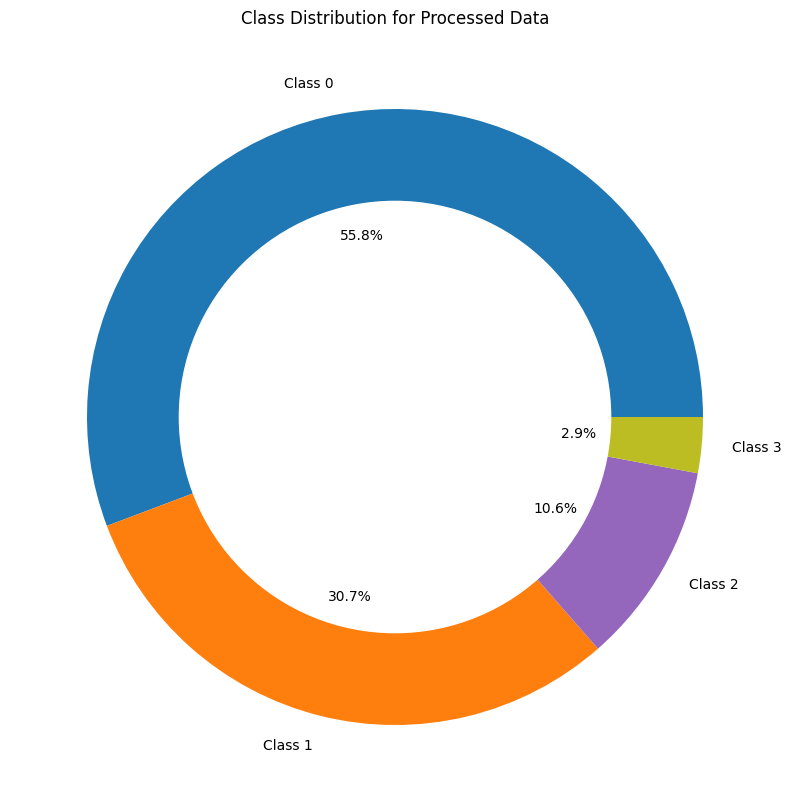

In [7]:

# representation of classes % wise
per_class_processed = df['y'].value_counts()
plt.figure(figsize=(20, 10))
my_circle_processed = plt.Circle((0, 0), 0.7, color='white')
plt.pie(per_class_processed, labels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
        colors=['tab:blue', 'tab:orange', 'tab:purple', 'tab:olive'], autopct='%1.1f%%')
p_processed = plt.gcf()
p_processed.gca().add_artist(my_circle_processed)
plt.title('Class Distribution for Processed Data')
plt.show()



## Splitting data

In [5]:
from sklearn.model_selection import train_test_split


df = pd.concat([df_id,df], axis=1)
X = df.drop('y', axis=1)
y = df['y']

# Splitting the data into training (80%) and temporary (20%)
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert the train and test splits into dataframes
df_train = pd.DataFrame(df_train, columns=X.columns)
df_test = pd.DataFrame(df_test, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=['y'])
y_test = pd.DataFrame(y_test, columns=['y'])


In [6]:
df_train = pd.concat([df_train, y_train], axis=1)
df_test = pd.concat([df_test, y_test], axis=1)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df_train = df_train.drop(columns='id', axis=1)
df_test_id = df_test['id']
df_test = df_test.drop(columns='id', axis=1)

## Preprocessing

In [ ]:
'''
# Resampling

from sklearn.utils import resample

df_1 = df_train[df_train['y'] == 1]
df_2 = df_train[df_train['y'] == 2]
df_3 = df_train[df_train['y'] == 3]
df_0 = df_train[df_train['y'] == 0].sample(n=5000, random_state=42)

df_1_upsample = resample(df_1, replace=True, n_samples=5000, random_state=123)
df_2_upsample = resample(df_2, replace=True, n_samples=5000, random_state=124)
df_3_upsample = resample(df_3, replace=True, n_samples=5000, random_state=125)

df_train = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample])
'''

"\n# Resampling\n\nfrom sklearn.utils import resample\n\ndf_1 = df_train[df_train['y'] == 1]\ndf_2 = df_train[df_train['y'] == 2]\ndf_3 = df_train[df_train['y'] == 3]\ndf_0 = df_train[df_train['y'] == 0].sample(n=5000, random_state=42)\n\ndf_1_upsample = resample(df_1, replace=True, n_samples=5000, random_state=123)\ndf_2_upsample = resample(df_2, replace=True, n_samples=5000, random_state=124)\ndf_3_upsample = resample(df_3, replace=True, n_samples=5000, random_state=125)\n\ndf_train = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample])\n"

In [7]:
# Calculate class weights to counter class imbalance
y_train = df_train['y']
total = y_train.shape[0]
class_counts = y_train.value_counts()
class_weights = {class_label: (1 / count) * (total / 4.0) for class_label, count in class_counts.items()}
print(class_weights)


{0: 0.448410572892408, 2: 0.814343716297659, 1: 2.353449856383304, 3: 8.546271637816245}


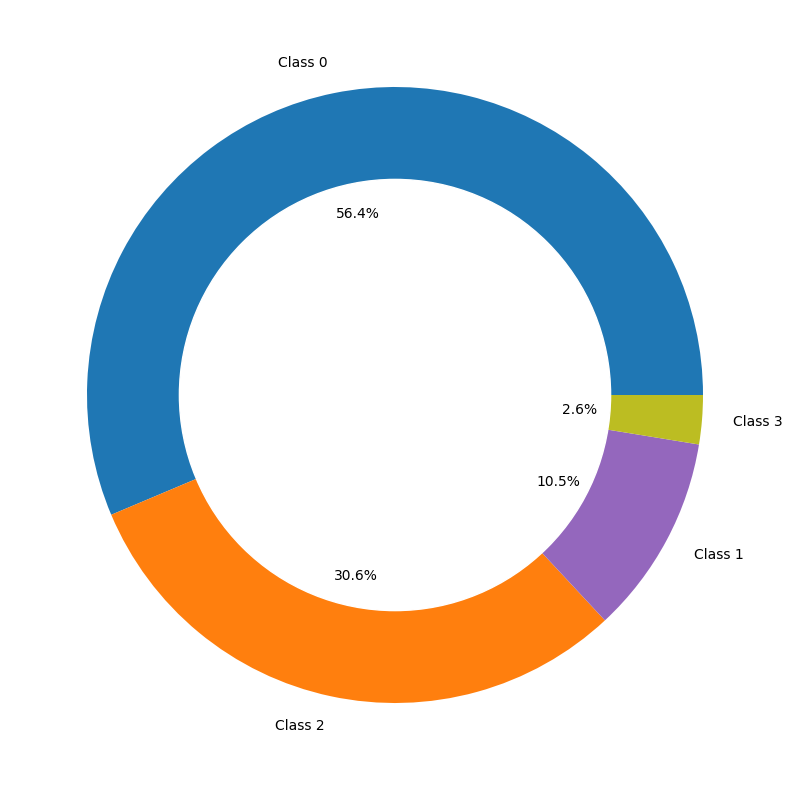

In [ ]:
# representation of classes % wise
per_class = df_train['y'].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['Class 0','Class 2','Class 1','Class 3'], colors=['tab:blue','tab:orange','tab:purple','tab:olive'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



In [8]:
# Pre Trearment (noise)
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,df_train.shape[1]-1)
    return (signal+noise)

In [9]:
classes=df_train.groupby('y',group_keys=False).apply(lambda df_train : df_train.sample(1))
tempo=classes.iloc[0,:df_train.shape[1]-1]
bruiter=add_gaussian_noise(tempo)

In [10]:
#from keras.utils import to_categorical

target_train=df_train['y']
target_test=df_test['y']
#y_train=to_categorical(target_train)
#y_test=to_categorical(target_test)
y_train=target_train
y_test=target_test

In [11]:
X_train=df_train.iloc[:,:df_train.shape[1]-1].values
X_test=df_test.iloc[:,:df_test.shape[1]-1].values

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [15]:
print(X_train.shape)
print(X_test.shape)

(154038, 180, 1)
(38510, 180, 1)


In [189]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import f1_score


class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=4, dropout=0):
        super(GRUModel, self).__init__()
        # self.gru = nn.GRU(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout, bidirectional=True)
        #self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout, bidirectional=True)
        self.lstm = nn.GRU(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout, bidirectional=True)
        self.fc1 = nn.Linear(hidden_size * 2, hidden_size) 
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        #print(x.shape)
        #packed_output,(hidden_state,cell_state)= self.lstm(x)
        packed_output,hidden_state= self.lstm(x)
        # Assuming you want the last hidden state
        hidden = torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim = 1)
        
        # Max pooling across the sequence dimension
        #print('hidden', hidden.shape)
        #out, out2 = torch.max(hidden, dim=1)
        #print('out', out.shape, out2.shape)
        out = hidden
        out = self.fc1(out)
        out = self.relu(out)
        # Uncomment the line below if you want to apply dropout
        #out = self.dropout(out)
        #out = self.fc2(out)
        #out = self.relu(out)
    
        out = self.fc3(out)
        return out
    
    def softmax(self, x):
        return torch.softmax(x, dim=-1)
    

class CustomDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, index):
        sequence = torch.tensor(self.sequences[index]).float() #.unsqueeze(-1) # uncomment for RNNs with 1d input
        # transpose to (batch, seq_len, input_size)
        #print(sequence.shape)
        #sequence = sequence.transpose(0, 1)
        #print(sequence.shape)
        label = torch.tensor(self.labels[index]).long()
        return sequence, label
    

def train(model, num_epochs, batch_size, learning_rate, train_df, train_y, val_df, val_y, weights_dir='weights', class_weights_normalized=[1, 1, 1, 1]):
    train_dataset = CustomDataset(train_df, train_y)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = CustomDataset(val_df, val_y)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    #class_weights_normalized = np.array([0.448410572892408, 0.814343716297659, 2.353449856383304, 8.546271637816245]) #np.array([1.69, 11.6, 3.47, 30])/np.sum([1.69, 11.6, 3.47, 30]) #[0.1, 0.7, 0.2]
    
    class_weights = torch.FloatTensor(class_weights_normalized).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.0001)
    model.to(device)

    os.makedirs(weights_dir, exist_ok=True)

    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        for sequences, labels in train_loader: #tqdm(train_loader):
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            """
            l2_reg = torch.tensor(0.0).to(device)
            for param in model.parameters():
                l2_reg += torch.norm(param, p=2)

            l1_reg = torch.tensor(0.0).to(device)
            for param in model.parameters():
                l1_reg += torch.norm(param, p=1)

            loss += 0.0001 * l2_reg #+ 0.0001 * l1_reg
            """
            optimizer.zero_grad()
            loss.backward()
            # apply gradient clipping here
            torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            optimizer.step()
            running_loss += loss.item()

        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for sequences, labels in val_loader:
                #print(labels)
                sequences, labels = sequences.to(device), labels.to(device)
                outputs = model(sequences)
                test_loss = criterion(outputs, labels)
                outputs = model.softmax(outputs)
                _, predicted = torch.max(outputs.data, 1)
                predicted_np = outputs.cpu().numpy()
                #print(predicted_np)
                #print(np.unique(predicted_np, return_counts=True))
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                f1 = f1_score(labels.cpu().numpy(), predicted.cpu().numpy(), average='macro')

            accuracy = correct / total
            print(f'Epoch {epoch+1}/{num_epochs}, Train loss: {running_loss/len(train_loader):.4f}, Val loss: {test_loss.item():.4f}, Validation Accuracy: {accuracy:.2%}, F1 score: {f1:.4f}')
            torch.save(model.state_dict(), f'{weights_dir}/gru_epoch_{epoch+1}.pth')


In [218]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,df_train.shape[1]-1)
    #print(noise.shape)
    return (signal+noise)

# print X_train 
print(X_train[0].shape)
print(y_train.shape)
train_processed = X_train.squeeze()
val_processed = X_test
train_y = y_train
val_y = y_test

# Select the elements of class 2 and add their copy with gausian noise to the training set
class_1 = train_processed[train_y == 1]
print(train_processed.shape)
class_1_noisy = np.array([add_gaussian_noise(x) for x in class_1])
print(class_1_noisy.shape)
class_1_noisy_pt2 = np.array([add_gaussian_noise(x) for x in class_1])
train_processed = np.concatenate((train_processed, class_1_noisy, class_1_noisy_pt2))
train_y = np.concatenate((train_y, np.ones(len(class_1_noisy)), np.ones(len(class_1_noisy))))
# do the same for class 3
class_3 = train_processed[train_y == 3]
class_3_noisy = np.array([add_gaussian_noise(x) for x in class_3])
class_3_noisy_pt2 = np.array([add_gaussian_noise(x) for x in class_3])
class_3_noisy_pt3 = np.array([add_gaussian_noise(x) for x in class_3])
class_3_noisy_pt4 = np.array([add_gaussian_noise(x) for x in class_3])
train_processed = np.concatenate((train_processed, class_3_noisy, class_3_noisy_pt2, class_3_noisy_pt3, class_3_noisy_pt4))
train_y = np.concatenate((train_y, np.ones(len(class_3_noisy)) * 3, np.ones(len(class_3_noisy)) * 3, np.ones(len(class_3_noisy)) * 3, np.ones(len(class_3_noisy)) * 3))

print(train_processed.shape)
train_processed = train_processed.reshape(len(train_processed), train_processed.shape[1], 1)
print(train_processed.shape)


(180, 1)
(154038,)
(154038, 180)
(16363, 180)
(204788, 180)
(204788, 180, 1)


In [219]:
def add_gaussian_noise(signal, power=0.05):
    noise=np.random.normal(0,power,df_train.shape[1]-1)
    #print(noise.shape)
    return (signal+noise)


train_processed = X_train.squeeze()
val_processed = X_test.squeeze()
train_y = y_train
val_y = y_test

print(train_processed.shape)
print(val_processed.shape)

# leave only 1 sample in val_processed, and move all the rest to train_processed
train_processed = np.concatenate((train_processed, val_processed[1:]))
train_y = np.concatenate((train_y, val_y[1:]))
val_processed = val_processed[:1]
val_y = val_y[:1]


print(train_processed.shape)
print(val_processed.shape)

repeat_times = {0: 1, 1: 5, 2: 2, 3: 10}

for cls, scale in repeat_times.items():
    if cls == 0:
        continue
    class_samples = train_processed[train_y == cls]
    class_samples_aug = []
    for i in range(int(scale-1)):
        class_samples_aug.append(np.array([add_gaussian_noise(x, 0.2) for x in class_samples]))
        if cls == 2:
            # remove the half of the added class 2 samples
            class_samples_aug[-1] = class_samples_aug[-1][::2]
    class_samples_aug = np.concatenate(class_samples_aug)
    train_processed = np.concatenate((train_processed, class_samples_aug))
    train_y = np.concatenate((train_y, np.ones(len(class_samples_aug)) * cls))

# discard class 3 from train and val
"""
train_processed = train_processed[train_y != 3]
train_y = train_y[train_y != 3]
val_processed = val_processed[val_y != 3]
val_y = val_y[val_y != 3].values
"""
# do the same for val, but without adding noise
"""
for cls, scale in repeat_times.items():
    if cls == 0:
        continue
    class_samples = val_processed[val_y == cls]
    class_samples_aug = []
    for i in range(int(scale-1)):
        class_samples_aug.append(class_samples)
        if cls == 2:
            # remove the half of the added class 2 samples
            class_samples_aug[-1] = class_samples_aug[-1][::2]
    class_samples_aug = np.concatenate(class_samples_aug)
    val_processed = np.concatenate((val_processed, class_samples_aug))
    val_y = np.concatenate((val_y, np.ones(len(class_samples_aug)) * cls))
"""
val_processed = val_processed.reshape(len(val_processed), val_processed.shape[1], 1)
train_processed = train_processed.reshape(len(train_processed), train_processed.shape[1], 1)

print(train_processed.shape)
print(train_y.shape)
print(val_processed.shape)
print(val_y.shape)

(154038, 180)
(38510, 180)
(192547, 180)
(1, 180)
(354603, 180, 1)
(354603,)
(1, 180, 1)
(1,)


In [185]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

"""df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert the train and test splits into dataframes
df_train = pd.DataFrame(df_train, columns=X.columns)
df_test = pd.DataFrame(df_test, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=['y'])
y_test = pd.DataFrame(y_test, columns=['y'])

df_train = pd.concat([df_train, y_train], axis=1)
df_test = pd.concat([df_test, y_test], axis=1)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df_train = df_train.drop(columns='id', axis=1)
df_test_id = df_test['id']
df_test = df_test.drop(columns='id', axis=1)"""

train_for_hgb_X = df_test.iloc[:,:df_test.shape[1]-1]
train_for_hgb_y = y_test
df_test_id

def trainHGB(gru_model, Xdf, ydf, iddf, weights_path):
    # predict the probabilities for each class using gru
    # group samples by id
    # train a HGB classifier on the probabilities and the labels
    # return the trained HGB classifier

    gru_model.load_state_dict(torch.load(weights_path))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    gru_model.to(device)
    gru_model.eval()

    val_loader = DataLoader(CustomDataset(Xdf, ydf), batch_size=128, shuffle=False)

    preds = []
    with torch.no_grad():
        for sequences, labels in val_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = gru_model(sequences)
            outputs = gru_model.softmax(outputs)
            preds.append(outputs.cpu().numpy())
    preds = np.concatenate(preds)
    print(preds.shape)

    # group samples by id
    preds_by_id = {}
    for i, id in enumerate(iddf):
        if id not in preds_by_id:
            preds_by_id[id] = []
        preds_by_id[id].append(preds[i])
    for id in preds_by_id:
        preds_by_id[id] = np.array(preds_by_id[id])
    print(len(preds_by_id))
    print(ydf.shape)

    # aappend the predictions for each id
    X_hgb = []
    y_hgb = []

    for id in preds_by_id:
        X_hgb.append(np.concatenate(preds_by_id[id]))
        y_hgb.append(ydf[ydf['id'] == id].iloc[0]['y'])
    X_hgb = np.array(X_hgb)
    y_hgb = np.array(y_hgb)
    print(X_hgb.shape)
    print(y_hgb.shape)

    # train a HGB classifier on the probabilities and the labels
    hgb = HistGradientBoostingClassifier(max_iter=1000, learning_rate=0.01, max_depth=10, min_samples_leaf=10, l2_regularization=0.1)
    hgb.fit(X_hgb, y_hgb)
    return hgb

    

hgb = trainHGB(model, train_processed, train_y, df_test_id, 'weights_t5/gru_epoch_42.pth')


    

RuntimeError: Error(s) in loading state_dict for CNNLSTMModel:
	Missing key(s) in state_dict: "cnn.0.weight", "cnn.0.bias", "cnn.4.weight", "cnn.4.bias", "fc.weight", "fc.bias". 
	Unexpected key(s) in state_dict: "fc1.weight", "fc1.bias", "fc2.weight", "fc2.bias", "fc3.weight", "fc3.bias", "lstm.weight_ih_l0_reverse", "lstm.weight_hh_l0_reverse", "lstm.bias_ih_l0_reverse", "lstm.bias_hh_l0_reverse", "lstm.weight_ih_l1", "lstm.weight_hh_l1", "lstm.bias_ih_l1", "lstm.bias_hh_l1", "lstm.weight_ih_l1_reverse", "lstm.weight_hh_l1_reverse", "lstm.bias_ih_l1_reverse", "lstm.bias_hh_l1_reverse", "lstm.weight_ih_l2", "lstm.weight_hh_l2", "lstm.bias_ih_l2", "lstm.bias_hh_l2", "lstm.weight_ih_l2_reverse", "lstm.weight_hh_l2_reverse", "lstm.bias_ih_l2_reverse", "lstm.bias_hh_l2_reverse", "lstm.weight_ih_l3", "lstm.weight_hh_l3", "lstm.bias_ih_l3", "lstm.bias_hh_l3", "lstm.weight_ih_l3_reverse", "lstm.weight_hh_l3_reverse", "lstm.bias_ih_l3_reverse", "lstm.bias_hh_l3_reverse", "lstm.weight_ih_l4", "lstm.weight_hh_l4", "lstm.bias_ih_l4", "lstm.bias_hh_l4", "lstm.weight_ih_l4_reverse", "lstm.weight_hh_l4_reverse", "lstm.bias_ih_l4_reverse", "lstm.bias_hh_l4_reverse", "lstm.weight_ih_l5", "lstm.weight_hh_l5", "lstm.bias_ih_l5", "lstm.bias_hh_l5", "lstm.weight_ih_l5_reverse", "lstm.weight_hh_l5_reverse", "lstm.bias_ih_l5_reverse", "lstm.bias_hh_l5_reverse". 
	size mismatch for lstm.weight_ih_l0: copying a param with shape torch.Size([768, 1]) from checkpoint, the shape in current model is torch.Size([128, 16]).
	size mismatch for lstm.weight_hh_l0: copying a param with shape torch.Size([768, 256]) from checkpoint, the shape in current model is torch.Size([128, 32]).
	size mismatch for lstm.bias_ih_l0: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for lstm.bias_hh_l0: copying a param with shape torch.Size([768]) from checkpoint, the shape in current model is torch.Size([128]).

In [ ]:
def inferHGBsubmission(gru_model, model_weights, hgb, Xdf, idxdf, weights_path):
    # predict the probabilities for each class using gru
    # group samples by id
    # infer the labels using the HGB classifier
    # return the inferred labels

    gru_model.load_state_dict(torch.load(weights_path))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    gru_model.to(device)
    gru_model.eval()

    preds = []
    with torch.no_grad():
        for sequences, labels in Xdf:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = gru_model(sequences)
            outputs = gru_model.softmax(outputs)
            preds.append(outputs.cpu().numpy())
    preds = np.concatenate(preds)
    print(preds.shape)

    # group samples by id
    preds_grouped = []
    for i in range(len(idxdf.unique())):
        preds_grouped.append(preds[idxdf == i])
    preds_grouped = np.array(preds_grouped)
    print(preds_grouped.shape)

    # infer the labels using the HGB classifier
    preds_grouped = preds_grouped.reshape(preds_grouped.shape[0], preds_grouped.shape[1] * preds_grouped.shape[2])
    preds_grouped = hgb.predict(preds_grouped)
    return preds_grouped


df_true_test = pd.read_csv('X_test_heartbeats.csv')
df_true_test_ids = df_true_test['id']
df_true_test = df_true_test.drop(columns=['Unnamed: 0','id'], axis=1)
#df_true_test = df_true_test.drop(columns=['id'], axis=1)

X_true_test = df_true_test.values.reshape(len(df_true_test), df_true_test.shape[1], 1)



In [ ]:
input_size = 1 # train_processed.shape[1]
hidden_size = 256
output_size = 4 
batch_size = 64
num_epochs = 30
learning_rate = 0.00007

model = GRUModel(input_size, hidden_size, output_size, num_layers=6, dropout=0.3)

train(model, num_epochs, batch_size, learning_rate, train_processed, train_y, val_processed, val_y, weights_dir='weights', class_weights_normalized=[1, 1, 1])

In [213]:
torch.cuda.empty_cache()

In [220]:
input_size = 1 # train_processed.shape[1]
hidden_size = 256
output_size = 4 
batch_size = 128 #512 #64
num_epochs = 20
learning_rate = 0.00015

model1 = GRUModel(input_size, hidden_size, output_size, num_layers=6, dropout=0.3)

train(model1, num_epochs, batch_size, learning_rate, train_processed, train_y, val_processed, val_y, weights_dir='weights_f')

Epoch 1/20, Train loss: 0.8556, Val loss: 1.8296, Validation Accuracy: 0.00%, F1 score: 0.0000
Epoch 2/20, Train loss: 0.6827, Val loss: 2.3220, Validation Accuracy: 0.00%, F1 score: 0.0000
Epoch 3/20, Train loss: 0.6295, Val loss: 1.4738, Validation Accuracy: 0.00%, F1 score: 0.0000
Epoch 4/20, Train loss: 0.5840, Val loss: 1.2776, Validation Accuracy: 0.00%, F1 score: 0.0000
Epoch 5/20, Train loss: 0.5418, Val loss: 1.0181, Validation Accuracy: 100.00%, F1 score: 1.0000
Epoch 6/20, Train loss: 0.5035, Val loss: 1.2451, Validation Accuracy: 0.00%, F1 score: 0.0000
Epoch 7/20, Train loss: 0.4684, Val loss: 1.1000, Validation Accuracy: 0.00%, F1 score: 0.0000
Epoch 8/20, Train loss: 0.4365, Val loss: 1.6861, Validation Accuracy: 0.00%, F1 score: 0.0000
Epoch 9/20, Train loss: 0.4077, Val loss: 0.9722, Validation Accuracy: 100.00%, F1 score: 1.0000
Epoch 10/20, Train loss: 0.3811, Val loss: 1.6364, Validation Accuracy: 0.00%, F1 score: 0.0000
Epoch 11/20, Train loss: 0.3574, Val loss: 1.

In [163]:
class Improved1DCNN(nn.Module):
    def __init__(self, input_size, num_classes, dropout=0.5):
        super(Improved1DCNN, self).__init__()

        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(64, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * (input_size // 4), 32)
        self.fc2 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

    def softmax(self, x):
        return torch.softmax(x, dim=-1)

In [38]:
train_processed.squeeze().shape

(154038, 180)

In [166]:
input_size = 180 # train_processed.shape[1]
hidden_size = 128
output_size = 4 
batch_size = 256
num_epochs = 100
learning_rate = 0.01


icn = Improved1DCNN(input_size, output_size, dropout=0.5)

train(icn, num_epochs, batch_size, learning_rate, train_processed.squeeze(), train_y, val_processed.squeeze(), val_y, weights_dir='weights_icn')

Epoch 1/100, Train loss: 0.9485, Val loss: 0.8160, Validation Accuracy: 59.48%, F1 score: 0.3231
Epoch 2/100, Train loss: 0.9107, Val loss: 0.8330, Validation Accuracy: 58.55%, F1 score: 0.2690
Epoch 3/100, Train loss: 0.9060, Val loss: 0.9475, Validation Accuracy: 59.17%, F1 score: 0.1905
Epoch 4/100, Train loss: 0.9043, Val loss: 0.8872, Validation Accuracy: 59.74%, F1 score: 0.2812
Epoch 5/100, Train loss: 0.9002, Val loss: 0.9114, Validation Accuracy: 59.52%, F1 score: 0.2871
Epoch 6/100, Train loss: 0.8978, Val loss: 0.9628, Validation Accuracy: 59.46%, F1 score: 0.4097
Epoch 7/100, Train loss: 0.8973, Val loss: 0.8388, Validation Accuracy: 59.51%, F1 score: 0.3650
Epoch 8/100, Train loss: 0.8969, Val loss: 0.9360, Validation Accuracy: 59.91%, F1 score: 0.2741
Epoch 9/100, Train loss: 0.8941, Val loss: 0.9207, Validation Accuracy: 60.82%, F1 score: 0.4050
Epoch 10/100, Train loss: 0.8921, Val loss: 0.9462, Validation Accuracy: 60.36%, F1 score: 0.2349
Epoch 11/100, Train loss: 0.8

In [180]:
import torch
import torch.nn as nn

class CNNLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CNNLSTMModel, self).__init__()

        # CNN layers
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Dropout(0.3),
            nn.Conv1d(in_channels=32, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Dropout(0.3)
        )

        # LSTM layer
        self.lstm = nn.LSTM(input_size=16, hidden_size=hidden_size, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Assuming input shape: (batch_size, sequence_length, input_size)
        x = x.unsqueeze(1)  # Add channel dimension

        # CNN forward
        x = self.cnn(x)

        # Reshape for LSTM
        batch_size, channels, seq_length = x.size()
        x = x.view(batch_size, seq_length, channels)

        # LSTM forward
        lstm_out, _ = self.lstm(x)

        # Only take the output from the last time step
        lstm_out = lstm_out[:, -1, :]

        # Fully connected layer
        out = self.fc(lstm_out)

        return out
    
    def softmax(self, x):
        return torch.softmax(x, dim=-1)

# Example usage
input_size = 180  # Assuming input sequences of length 180
hidden_size = 32  # Reduced the number of hidden units
num_classes = 4   # Number of output classes

model = CNNLSTMModel(input_size, hidden_size, num_classes)
print(model)


CNNLSTMModel(
  (cnn): Sequential(
    (0): Conv1d(1, 32, kernel_size=(3,), stride=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv1d(32, 16, kernel_size=(3,), stride=(1,))
    (5): ReLU()
    (6): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.3, inplace=False)
  )
  (lstm): LSTM(16, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=4, bias=True)
)


In [182]:
input_size = 180  # Assuming input sequences of length 180
hidden_size = 32  # You can adjust this based on your problem
num_classes = 4
batch_size = 64
num_epochs = 30
learning_rate = 0.005
model = CNNLSTMModel(input_size, hidden_size, num_classes)

train(model, num_epochs, batch_size, learning_rate, train_processed.squeeze(), train_y, val_processed.squeeze(), val_y, weights_dir='weights_cnnlstm')

Epoch 1/30, Train loss: 0.8969, Val loss: 0.9463, Validation Accuracy: 60.26%, F1 score: 0.2984
Epoch 2/30, Train loss: 0.8375, Val loss: 0.7660, Validation Accuracy: 61.92%, F1 score: 0.4841
Epoch 3/30, Train loss: 0.8198, Val loss: 0.6657, Validation Accuracy: 62.33%, F1 score: 0.4047
Epoch 4/30, Train loss: 0.8085, Val loss: 0.6481, Validation Accuracy: 62.86%, F1 score: 0.5350
Epoch 5/30, Train loss: 0.8017, Val loss: 0.7654, Validation Accuracy: 62.50%, F1 score: 0.5260
Epoch 6/30, Train loss: 0.7957, Val loss: 0.8424, Validation Accuracy: 62.81%, F1 score: 0.3972
Epoch 7/30, Train loss: 0.7898, Val loss: 0.9011, Validation Accuracy: 63.15%, F1 score: 0.4326
Epoch 8/30, Train loss: 0.7873, Val loss: 0.7619, Validation Accuracy: 63.08%, F1 score: 0.4979
Epoch 9/30, Train loss: 0.7858, Val loss: 0.9350, Validation Accuracy: 63.57%, F1 score: 0.3806
Epoch 10/30, Train loss: 0.7830, Val loss: 0.9111, Validation Accuracy: 63.28%, F1 score: 0.4239
Epoch 11/30, Train loss: 0.7819, Val lo

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    if len(y_test.shape) > 1:
        y_test = np.argmax(y_test, axis=1)
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3']

    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

def create_1d_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=input_shape))


    # Specify your filter, kernel, and blocks
    filters = 128
    kernel_size = 10
    blocks = 3

    # Add convolutional blocks
    for _ in range(blocks):
        model.add(Conv1D(filters, kernel_size, activation='relu', input_shape=input_shape))
        model.add(Conv1D(filters, kernel_size, activation='relu'))
        model.add(MaxPooling1D(2))
        model.add(Dropout(0.2))
        model.add(BatchNormalization())

    # Flatten and add dense layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [ ]:
def train_and_predict_1d_cnn(model, X_train, y_train):
    if len(y_train.shape) > 1:
        y_train = np.argmax(y_train, axis=1)

    batch_size = 512
    epochs = 500
    validation_split = 0.2

    callbacks = [EarlyStopping(monitor='val_loss', patience=20),
                 ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        callbacks=callbacks, validation_split=validation_split, class_weight=class_weights)

    model.load_weights('best_model.h5')

    return model, history

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

input_shape = (X_train.shape[1], 1)
num_classes = 4

cnn_model = create_1d_cnn(input_shape, num_classes)
model,history = train_and_predict_1d_cnn(cnn_model, X_train, y_train)

Epoch 1/500
 28/223 [==>...........................] - ETA: 14:11 - loss: 1.5198 - accuracy: 0.3186

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

# Calculate micro-averaged F1 score
y_true_micro = np.argmax(y_test, axis=1)
y_pred_micro = np.argmax(y_pred, axis=1)
f1_micro = f1_score(y_true_micro, y_pred_micro, average='micro')
print("f1 score:", f1_micro)

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true_micro))
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
disp.ax_.set_title('Confusion Matrix')
plt.show()



# Calculate aggregated true scores
df_y_test_pred = pd.DataFrame({'id': df_test_id, 'y': y_pred_micro}, dtype=int)

df_ecg_pred_test = df_y_test_pred.groupby('id')['y'].agg(lambda x: x.mode().iloc[0]).reset_index()

y_true_aggr = np.zeros(len(df_ecg_pred_test))

for index, row in df_ecg_pred_test.iterrows():
    ecg_id = row['id']
    ecg_labels = y_test[df_test_id == ecg_id].argmax(axis=1)

    ecg_label = np.argmax(np.bincount(ecg_labels))

    y_true_aggr[index] = ecg_label


f1_aggr = f1_score(y_true_aggr, df_ecg_pred_test['y'], average='micro')
print('F1-score aggregated:', f1_aggr)

cm_aggr = confusion_matrix(y_true_aggr, df_ecg_pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_aggr, display_labels=np.unique(y_true_aggr))
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
disp.ax_.set_title('Confusion Matrix Aggregated')
plt.show()


## Create X_test file

In [205]:

from tqdm import tqdm
def predict_and_submission(model, weights_path, df_test_array, test_set_ids, submission_file_path='submission.csv'):
    
    model.load_state_dict(torch.load(weights_path))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    preds = []
    with torch.no_grad():
        # do it in batches of 256
        for i in tqdm(range(0, len(df_test_array), 256)):
            x = torch.tensor(df_test_array[i:i+256]).float().to(device)
            out = model(x)
            out = model.softmax(out)
            #_, predicted = torch.max(out.data, 1)
            predicted = out.data
            preds.append(predicted.cpu().numpy())
    
    preds = np.concatenate(preds)
    print(preds.shape)
    print(test_set_ids.shape)

    df_submission = pd.DataFrame({'id': test_set_ids, 'y0': preds[:, 0], 'y1': preds[:, 1], 'y2': preds[:, 2], 'y3': preds[:, 3]})
    df_submission = df_submission.groupby('id').mean().reset_index()
    # convert preds to labels by finding max of the mean of the groupped probabilities
    df_submission['y'] = df_submission[['y0', 'y1', 'y2', 'y3']].values.argmax(axis=1)
    df_submission = df_submission[['id', 'y']]
    print('sub',df_submission.shape)

    #df_submission = pd.DataFrame({'id': test_set_ids, 'y': preds}, dtype=int)
    #df_submission = df_submission.groupby('id')['y'].agg(lambda x: x.mode().iloc[0]).reset_index()
    # convert preds to labels by finding max of the mean of the groupped probabilities
    #df_submission['y'] = df_submission['y'].apply(lambda x: np.argmax(np.mean(x, axis=0)))

    df_submission.to_csv(submission_file_path, index=False)
    
    

In [221]:

df_true_test = pd.read_csv('X_test_heartbeats.csv')
df_true_test_ids = df_true_test['id']
df_true_test = df_true_test.drop(columns=['Unnamed: 0','id'], axis=1)
#df_true_test = df_true_test.drop(columns=['id'], axis=1)

X_true_test = df_true_test.values.reshape(len(df_true_test), df_true_test.shape[1], 1)

weights_path = 'weights_f/gru_epoch_20.pth'
submission_file_path = 'submission_f.csv'
input_size = 1 # train_processed.shape[1]
hidden_size = 256
output_size = 4
#model = GRUModel(input_size, hidden_size, output_size, num_layers=6, dropout=0.3)
predict_and_submission(model1, weights_path, X_true_test, df_true_test_ids, submission_file_path)


"""
y_true_test_pred = model.predict(X_true_test)

predicted_classes = np.argmax(y_true_test_pred, axis=1)

df_y_pred_true_test = pd.DataFrame({'id': df_true_test_ids, 'y': predicted_classes}, dtype=int)

# Majority vote to get ECG class
df_ecg_predictions = df_y_pred_true_test.groupby('id')['y'].agg(lambda x: x.mode().iloc[0]).reset_index()

df_ecg_predictions.to_csv('/content/drive/MyDrive/data/ecg_predictions.csv', index=False)
"""


100%|██████████| 501/501 [00:08<00:00, 57.52it/s]

(128108, 4)
(128108,)
sub (3411, 2)


"\ny_true_test_pred = model.predict(X_true_test)\n\npredicted_classes = np.argmax(y_true_test_pred, axis=1)\n\ndf_y_pred_true_test = pd.DataFrame({'id': df_true_test_ids, 'y': predicted_classes}, dtype=int)\n\n# Majority vote to get ECG class\ndf_ecg_predictions = df_y_pred_true_test.groupby('id')['y'].agg(lambda x: x.mode().iloc[0]).reset_index()\n\ndf_ecg_predictions.to_csv('/content/drive/MyDrive/data/ecg_predictions.csv', index=False)\n"

In [ ]:
#df_ecg_predictions.shape

In [ ]:
#df_X_test = pd.read_csv('/content/drive/MyDrive/data/X_test.csv')
#df_X_test.shape